In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
data = pd.read_csv("/content/brain_stroke.csv")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Performing Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [5]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.shape

(4981, 11)

In [7]:
data=data.drop(["Residence_type"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   avg_glucose_level  4981 non-null   float64
 7   bmi                4981 non-null   float64
 8   smoking_status     4981 non-null   object 
 9   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 389.3+ KB


In [8]:
data.drop_duplicates()
data

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,83.94,30.0,smokes,0


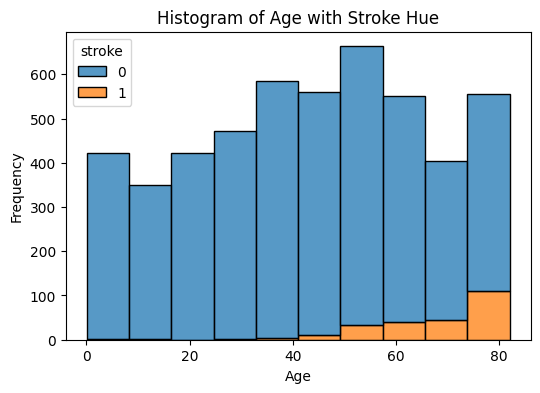

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x='age', hue='stroke', multiple='stack', bins=10)
plt.title('Histogram of Age with Stroke Hue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


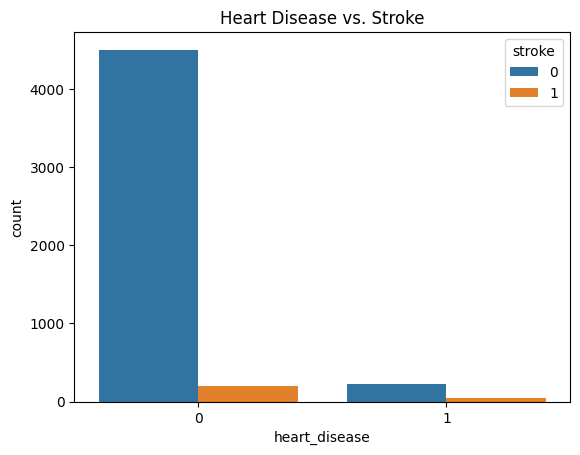

In [10]:
data['heart_disease'] = data['heart_disease'].astype('category')
sns.countplot(data=data, x='heart_disease', hue='stroke')
plt.title('Heart Disease vs. Stroke')
plt.show()

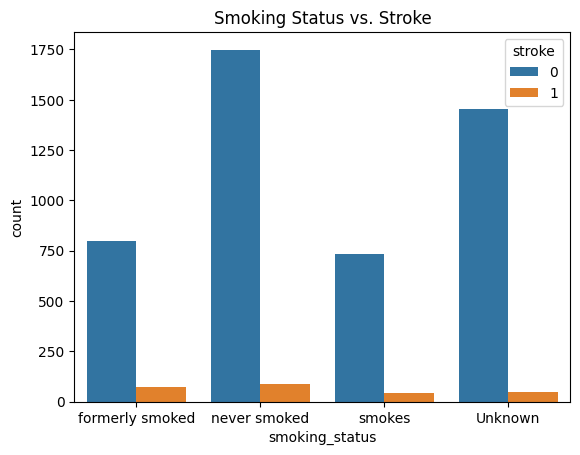

In [12]:
sns.countplot(data=data, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs. Stroke')
plt.show()

In [13]:
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtype == "object":
        data[i]=enc.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4981 non-null   int64   
 1   age                4981 non-null   float64 
 2   hypertension       4981 non-null   int64   
 3   heart_disease      4981 non-null   category
 4   ever_married       4981 non-null   int64   
 5   work_type          4981 non-null   int64   
 6   avg_glucose_level  4981 non-null   float64 
 7   bmi                4981 non-null   float64 
 8   smoking_status     4981 non-null   int64   
 9   stroke             4981 non-null   int64   
dtypes: category(1), float64(3), int64(6)
memory usage: 355.3 KB


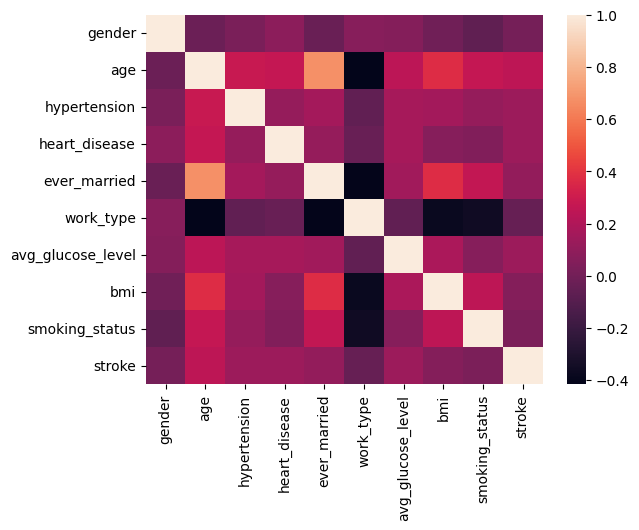

In [14]:
#correlation heatmap
sns.heatmap(data.corr())
plt.show()

In [15]:
y = data["stroke"]
x= data.drop(["stroke"], axis =1)

# Normalizing the independent variables

In [16]:
scaler = StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

# 1. Splitting data (60-40)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.40, random_state=0)

# Building Random Forest Model

In [18]:
modelrf = RandomForestClassifier(random_state=5)
modelrf.fit(x_train,y_train)
y_pred_rf = modelrf.predict(x_test)

acc_score_rf1 = accuracy_score(y_test, y_pred_rf)
pre_score_rf1 = precision_score(y_test, y_pred_rf, average='macro')
recall_rf1 = recall_score(y_test, y_pred_rf, average='macro')
f1_score_rf1 = f1_score(y_test, y_pred_rf, average='macro')
print("Accuracy score: %.3f"%acc_score_rf1)
print("Precision score: %.3f"%acc_score_rf1)
print("Recall score: %.3f"%pre_score_rf1)
print("F1 score: %.3f"%f1_score_rf1)

Accuracy score: 0.948
Precision score: 0.948
Recall score: 0.477
F1 score: 0.487


# 2. Splitting data (70-30)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [20]:
model = RandomForestClassifier(random_state=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

acc_score_rf2 = accuracy_score(y_test, y_pred)
pre_score_rf2 = precision_score(y_test, y_pred, average='macro')
recall_rf2 = recall_score(y_test, y_pred, average='macro')
f1_score_rf2 = f1_score(y_test, y_pred, average='macro')
print("Accuracy score: %.3f"%acc_score_rf2)
print("Precision score: %.3f"%acc_score_rf2)
print("Recall score: %.3f"%pre_score_rf2)
print("F1 score: %.3f"%f1_score_rf2)

Accuracy score: 0.953
Precision score: 0.953
Recall score: 0.541
F1 score: 0.502


# RFMODEL02 - Adjusting n_estimators = 10, n_jobs = 1

In [21]:
model02=RandomForestClassifier(n_estimators=10, n_jobs=1,random_state=11)
model02.fit(x_train,y_train)
y_pred=model02.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.953
Precision score: 0.478
Recall score: 0.498
F1 score: 0.488


# RFMODEL03 - Adjusting n_estimators = 50, n_jobs = 2

In [22]:
model03=RandomForestClassifier(n_estimators=50, n_jobs=2,random_state=5)
model03.fit(x_train,y_train)
y_pred=model03.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.953
Precision score: 0.541
Recall score: 0.505
F1 score: 0.502


# RFMODEL04 - Adjusting n_estimators = 100, n_jobs = 3

In [23]:
model04=RandomForestClassifier(n_estimators=100, n_jobs=3,random_state=5)
model04.fit(x_train,y_train)
y_pred=model04.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.953
Precision score: 0.541
Recall score: 0.505
F1 score: 0.502


#Visualizing the metrics with adjustments in data splitting(training & testing)

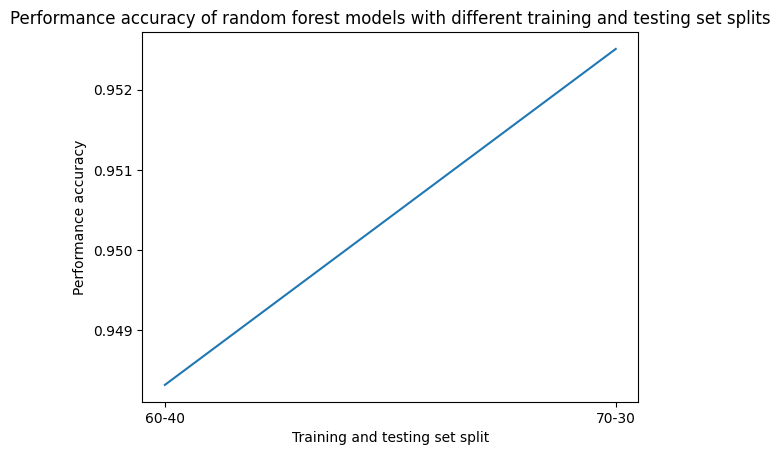

In [24]:
#list of the performance accuracies
accuracies = [acc_score_rf1, acc_score_rf2]

#list of the training and testing set splits
splits = ['60-40', '70-30']

# Plot the performance accuracy of each model against the training and testing set split
plt.plot(splits, accuracies)
plt.xlabel('Training and testing set split')
plt.ylabel('Performance accuracy')
plt.title('Performance accuracy of random forest models with different training and testing set splits')
plt.show()

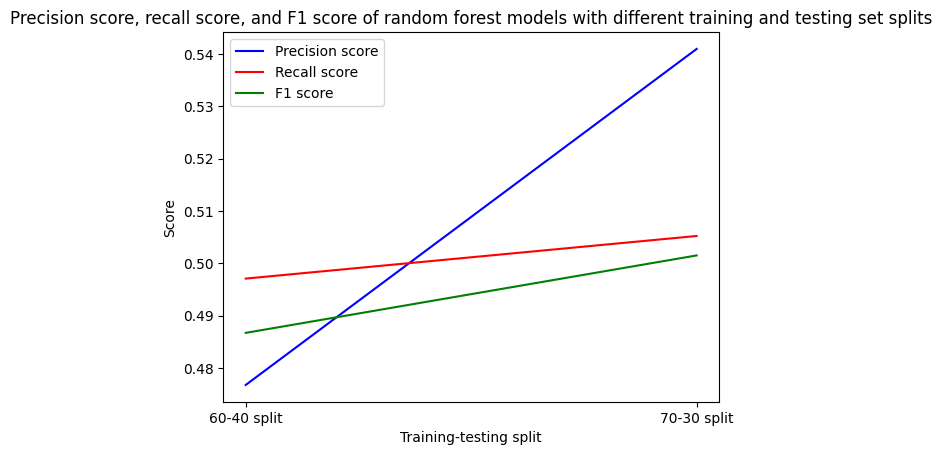

In [25]:
precision_scores = [pre_score_rf1, pre_score_rf2]
recall_scores = [recall_rf1, recall_rf2]
f1_scores = [f1_score_rf1, f1_score_rf2]
colors = ['blue', 'red']
labels = ['60-40 split', '70-30 split']

fig, ax = plt.subplots()

# Set the x-axis labels to be the training-testing splits
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)

# Plot the precision scores, recall scores, and F1 scores
ax.plot(precision_scores, label='Precision score', color=colors[0])
ax.plot(recall_scores, label='Recall score', color=colors[1])
ax.plot(f1_scores, label='F1 score', color='green')

# Set the title of the plot
ax.set_title('Precision score, recall score, and F1 score of random forest models with different training and testing set splits')
ax.set_xlabel('Training-testing split')
ax.set_ylabel('Score')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


#Confusion Matrix of Random Forest Model

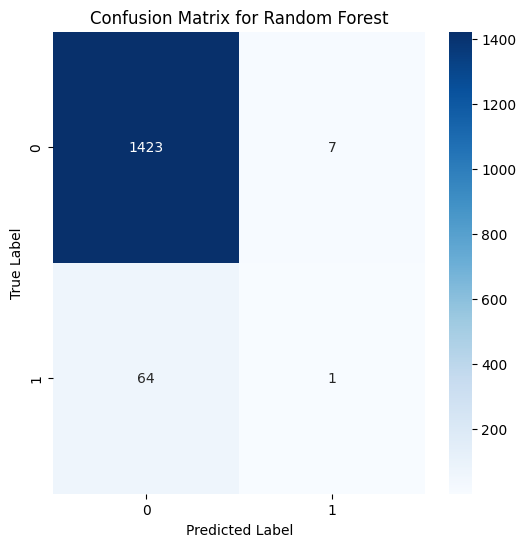

In [30]:
# For Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Splitting Data into (60 - 40)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.40, random_state=0)

#Building KNN Model

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)

acc_score_knn1 = accuracy_score(y_test, y_pred_knn)
pre_score_knn1 = precision_score(y_test, y_pred_knn, average='macro')
recall_knn1 = recall_score(y_test, y_pred_knn, average='macro')
f1_score_knn1 = f1_score(y_test, y_pred_knn, average='macro')
print("Accuracy score: %.3f"%acc_score_knn1)
print("Precision score: %.3f"%acc_score_knn1)
print("Recall score: %.3f"%pre_score_knn1)
print("F1 score: %.3f"%f1_score_knn1)


Accuracy score: 0.940
Precision score: 0.940
Recall score: 0.523
F1 score: 0.509


#Splitting Data into (70 - 30)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
y_pred_kn = knn_classifier.predict(x_test)


acc_score_knn2 = accuracy_score(y_test, y_pred_kn)
pre_score_knn2 = precision_score(y_test, y_pred_kn, average='macro')
recall_knn2 = recall_score(y_test, y_pred_kn, average='macro')
f1_score_knn2 = f1_score(y_test, y_pred_kn, average='macro')
print("Accuracy score: %.3f"%acc_score_knn2)
print("Precision score: %.3f"%acc_score_knn2)
print("Recall score: %.3f"%pre_score_knn2)
print("F1 score: %.3f"%f1_score_knn2)

Accuracy score: 0.955
Precision score: 0.955
Recall score: 0.579
F1 score: 0.503


# KNN Model02 (n_neighbors=4 ,leaf_size=4, metric=euclidean)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=4,leaf_size=4,metric='euclidean')
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.955
Precision score: 0.478
Recall score: 0.499
F1 score: 0.488


# KNN Model03 (n_neighbors=6, leaf_size=5, metric=manhathan)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=6, leaf_size=5, metric='manhattan')
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.956
Precision score: 0.478
Recall score: 0.500
F1 score: 0.489


# KNN Model04 (n_neighbors=9, leaf_size=10, metric=euclidean)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=9, leaf_size=10, metric='euclidean')
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.955
Precision score: 0.478
Recall score: 0.499
F1 score: 0.489


# Visualizing the metrics with adjustments in data splitting(training & testing)

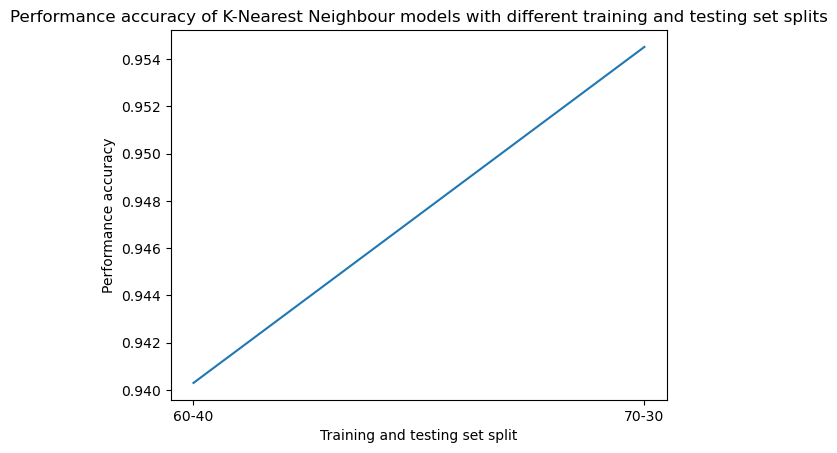

In [ ]:
#list of the performance accuracies
accuracies = [acc_score_knn1, acc_score_knn2]

#list of the training and testing set splits
splits = ['60-40', '70-30']

# Plotting the performance accuracy of each model against the training and testing set split
plt.plot(splits, accuracies)
plt.xlabel('Training and testing set split')
plt.ylabel('Performance accuracy')
plt.title('Performance accuracy of K-Nearest Neighbour models with different training and testing set splits')
plt.show()

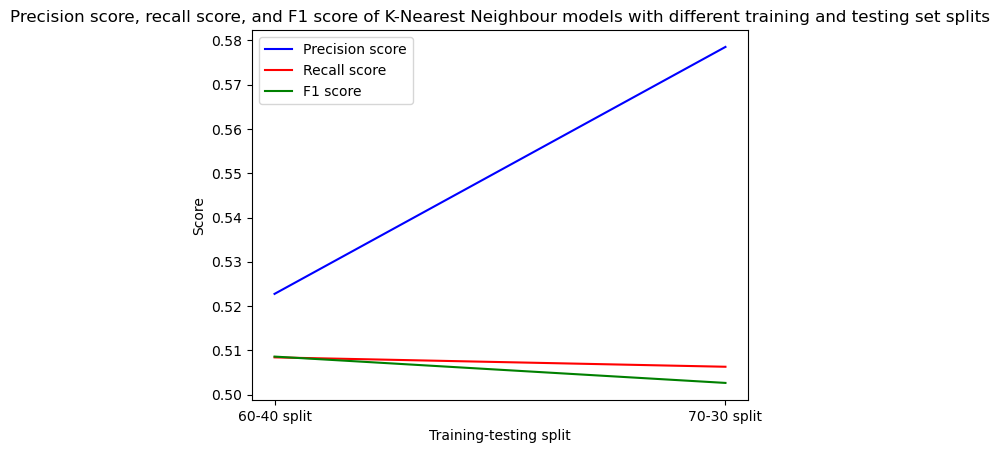

In [ ]:
precision_scores = [pre_score_knn1, pre_score_knn2]
recall_scores = [recall_knn1, recall_knn2]
f1_scores = [f1_score_knn1, f1_score_knn2]
colors = ['blue', 'red']
labels = ['60-40 split', '70-30 split']

fig, ax = plt.subplots()

# Set the x-axis labels to be the training-testing splits
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)

# Plotting the precision scores, recall scores, and F1 scores
ax.plot(precision_scores, label='Precision score', color=colors[0])
ax.plot(recall_scores, label='Recall score', color=colors[1])
ax.plot(f1_scores, label='F1 score', color='green')

ax.set_title('Precision score, recall score, and F1 score of K-Nearest Neighbour models with different training and testing set splits')
ax.set_xlabel('Training-testing split')
ax.set_ylabel('Score')
ax.legend()
plt.show()

# Confusion Matrix of KNN Model

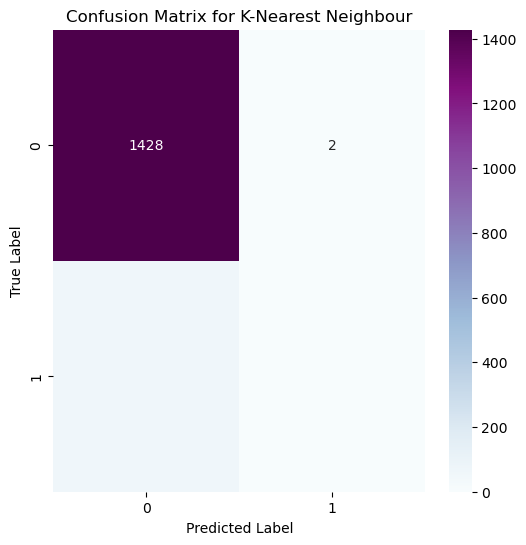

In [ ]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_knn, annot=True, cmap='BuPu', fmt='g')
plt.title('Confusion Matrix for K-Nearest Neighbour')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Splitting Data into (60 - 40)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.40, random_state=0)

# Building Decision Tree Model

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train1, y_train1)
y_pred_dt= decision_tree_classifier.predict(x_test1)

acc_score_dt1 = accuracy_score(y_test1, y_pred_dt)
pre_score_dt1 = precision_score(y_test1, y_pred_dt, average='macro')
recall_dt1= recall_score(y_test1, y_pred_dt, average='macro')
f1_score_dt1 = f1_score(y_test1, y_pred_dt, average='macro')
print("Accuracy score: %.3f"%acc_score_dt1)
print("Precision score: %.3f"%acc_score_dt1)
print("Recall score: %.3f"%pre_score_dt1)
print("F1 score: %.3f"%f1_score_dt1)

Accuracy score: 0.913
Precision score: 0.913
Recall score: 0.544
F1 score: 0.547


# Spliting Data into (70 - 30)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)
y_pred= decision_tree_classifier.predict(x_test)

acc_score_dt2 = accuracy_score(y_test, y_pred)
pre_score_dt2 = precision_score(y_test, y_pred, average='macro')
recall_dt2 = recall_score(y_test, y_pred, average='macro')
f1_score_dt2 = f1_score(y_test, y_pred, average='macro')
print("Accuracy score: %.3f"%acc_score_dt2)
print("Precision score: %.3f"%acc_score_dt2)
print("Recall score: %.3f"%pre_score_dt2)
print("F1 score: %.3f"%f1_score_dt2)

Accuracy score: 0.908
Precision score: 0.908
Recall score: 0.525
F1 score: 0.528


#DT Model02 (max_depth=3, min_samples_leaf=2, min_samples_split=2)

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2)
decision_tree_classifier.fit(x_train, y_train)
y_pred= decision_tree_classifier.predict(x_test)

acc_score_dtm2 = accuracy_score(y_test, y_pred)
pre_score_dtm2 = precision_score(y_test, y_pred, average='macro')
recall_dtm2 = recall_score(y_test, y_pred, average='macro')
f1_score_dtm2 = f1_score(y_test, y_pred, average='macro')
print("Accuracy score: %.3f"%acc_score_dtm2)
print("Precision score: %.3f"%acc_score_dtm2)
print("Recall score: %.3f"%pre_score_dtm2)
print("F1 score: %.3f"%f1_score_dtm2)

Accuracy score: 0.955
Precision score: 0.955
Recall score: 0.478
F1 score: 0.489


#DT Model03 (max_depth=5, min_samples_leaf=8, min_samples_split=5)

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=5)
decision_tree_classifier.fit(x_train, y_train)
y_pred= decision_tree_classifier.predict(x_test)

acc_score_dtm3 = accuracy_score(y_test, y_pred)
pre_score_dtm3 = precision_score(y_test, y_pred, average='macro')
recall_dtm3 = recall_score(y_test, y_pred, average='macro')
f1_score_dtm3 = f1_score(y_test, y_pred, average='macro')
print("Accuracy score: %.3f"%acc_score_dtm3)
print("Precision score: %.3f"%acc_score_dtm3)
print("Recall score: %.3f"%pre_score_dtm3)
print("F1 score: %.3f"%f1_score_dtm3)

Accuracy score: 0.953
Precision score: 0.953
Recall score: 0.478
F1 score: 0.488


#DT Model04 (max_depth=7, min_samples_leaf=8, min_samples_split=7)

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, min_samples_split=7)
decision_tree_classifier.fit(x_train, y_train)
y_pred= decision_tree_classifier.predict(x_test)

acc_score_dtm4 = accuracy_score(y_test, y_pred)
pre_score_dtm4 = precision_score(y_test, y_pred, average='macro')
recall_dtm4 = recall_score(y_test, y_pred, average='macro')
f1_score_dtm4 = f1_score(y_test, y_pred, average='macro')
print("Accuracy score: %.3f"%acc_score_dtm4)
print("Precision score: %.3f"%acc_score_dtm4)
print("Recall score: %.3f"%pre_score_dtm4)
print("F1 score: %.3f"%f1_score_dtm4)

Accuracy score: 0.953
Precision score: 0.953
Recall score: 0.478
F1 score: 0.488


# Visualizing the metrics with adjustments in data splitting(training & testing)

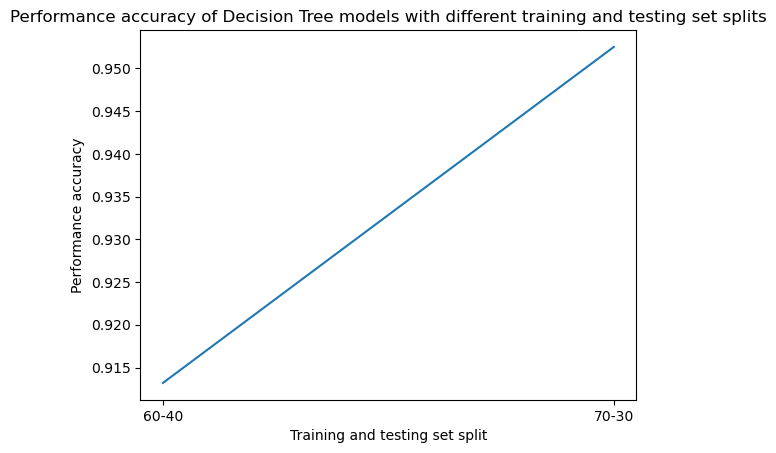

In [ ]:
#list of the performance accuracies
accuracies = [acc_score_dt1, acc_score_dtm4]
#list of the training and testing set splits
splits = ['60-40', '70-30']

# Plot the performance accuracy of each model against the training and testing set split
plt.plot(splits, accuracies)
plt.xlabel('Training and testing set split')
plt.ylabel('Performance accuracy')
plt.title('Performance accuracy of Decision Tree models with different training and testing set splits')
plt.show()

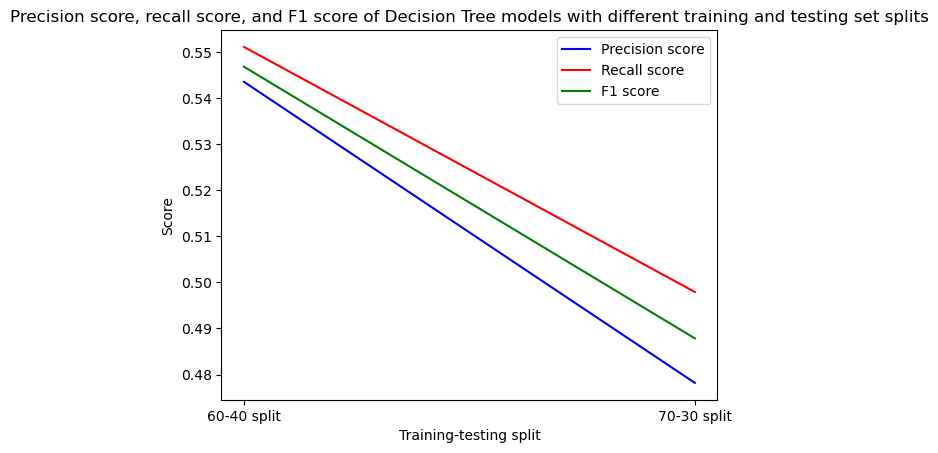

In [ ]:
precision_scores = [pre_score_dt1, pre_score_dtm4]
recall_scores = [recall_dt1, recall_dtm4]
f1_scores = [f1_score_dt1, f1_score_dtm4]
colors = ['blue', 'red']
labels = ['60-40 split', '70-30 split']

fig, ax = plt.subplots()

# Set the x-axis labels to be the training-testing splits
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)

# Plot the precision scores, recall scores, and F1 scores
ax.plot(precision_scores, label='Precision score', color=colors[0])
ax.plot(recall_scores, label='Recall score', color=colors[1])
ax.plot(f1_scores, label='F1 score', color='green')

# Set the title of the plot
ax.set_title('Precision score, recall score, and F1 score of Decision Tree models with different training and testing set splits')
ax.set_xlabel('Training-testing split')
ax.set_ylabel('Score')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


#Confusion Matrix for Decision Tree Model

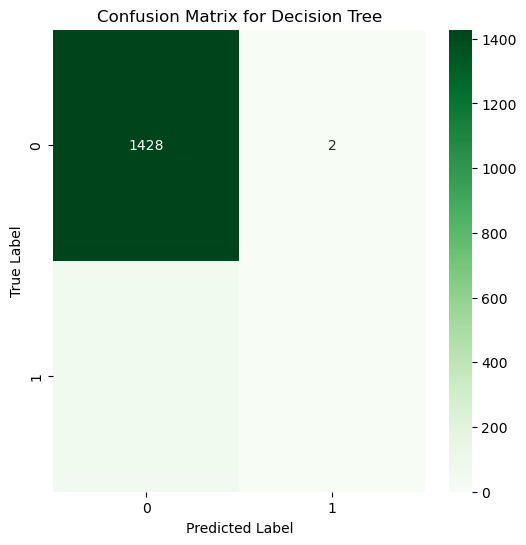

In [ ]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_knn, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

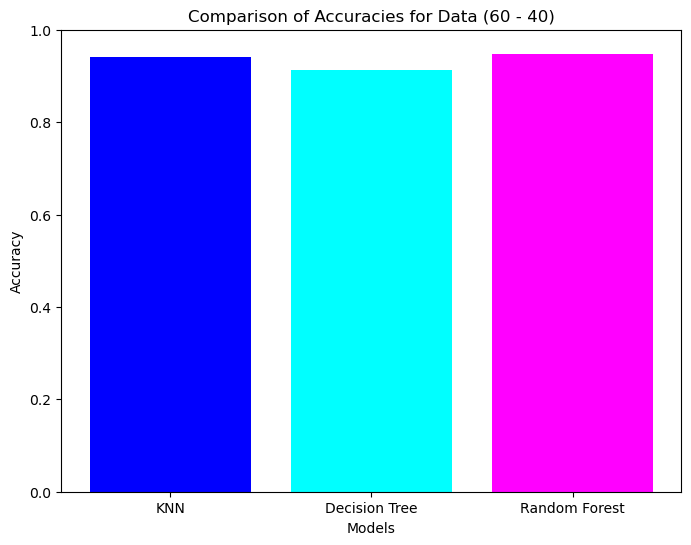

In [ ]:
models = ['KNN', 'Decision Tree', 'Random Forest']
accuracies = [acc_score_knn1, acc_score_dt1, acc_score_rf1]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'cyan', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Data (60 - 40)')
plt.ylim(0.0, 1.0)  # Set y-axis limits
plt.show()


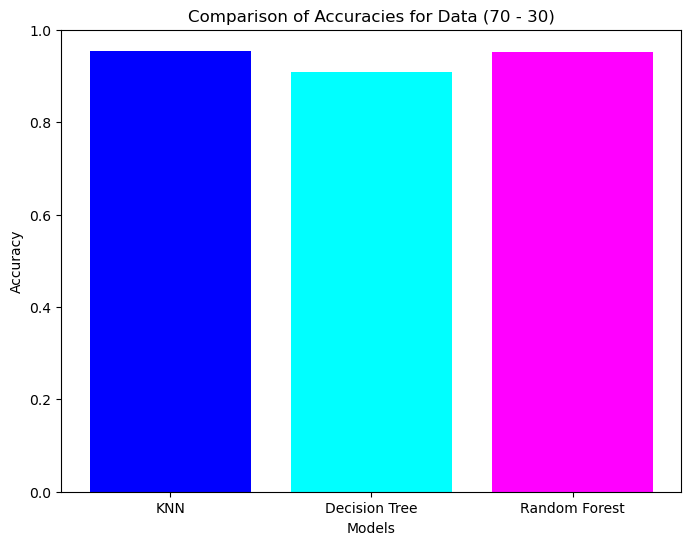

In [ ]:
models = ['KNN', 'Decision Tree', 'Random Forest']
accuracies = [acc_score_knn2, acc_score_dt2, acc_score_rf2]

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'cyan', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Data (70 - 30)')
plt.ylim(0.0, 1.0)  # Set y-axis limits
plt.show()

In [ ]:
#GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN model define karna
knn_classifier = KNeighborsClassifier()

# Hyperparameters ke combinations ka grid banana
param_grid = {
    'n_neighbors': [3,4,5],
    'weights': ['uniform', 'distance'],
   # 'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Added algorithm parameter
   # 'leaf_size': [4, 5, 6]  # Added leaf size parameter
}

# GridSearchCV object banake model ko tun karne ke liye tayyar karna
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Model ko train karna
grid_search.fit(x_train, y_train)

# Behtareen hyperparameters ko print karna
print("Best hyperparameters for KNN:", grid_search.best_params_)

#Best hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
#Best hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 5, 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
#Best hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 4, 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree model define karna
dt_classifier = DecisionTreeClassifier()

# Hyperparameters ke combinations ka grid banana
param_grid = {
    'max_depth': [ 3,4,5],
    'min_samples_split': [2, 4, 5],
    'min_samples_leaf': [1, 2, 4],

}

# GridSearchCV object banake model ko tun karne ke liye tayyar karna
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Model ko train karna
grid_search.fit(x_train, y_train)

# Behtareen hyperparameters ko print karna
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)


#Best hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
#Best hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
#Best hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}